# Data Preprocessing in Pandas

## 1. Necessary Imports 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## 2. Data Load & Description 

In [ ]:
data=pd.read_csv('loans_data.csv')

In [ ]:
data.head()

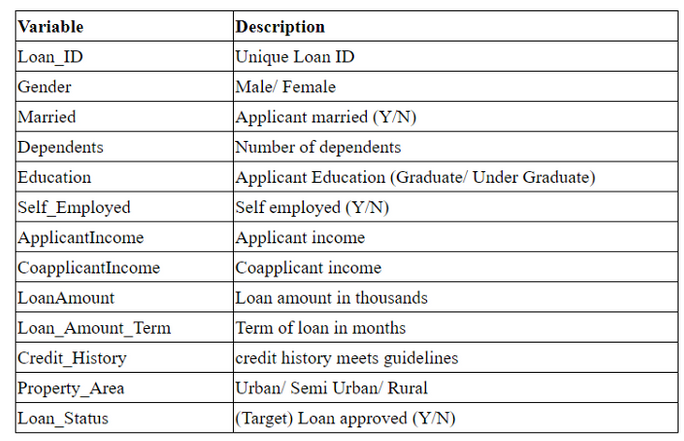

In [ ]:
data.shape

In [ ]:
data.describe()

## 3. Handling Missing Values

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
data=data.dropna()

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

## 4. Deleting Unnecessary Columns 

In [ ]:
del data['Loan_ID']

In [ ]:
data.shape

## 5. Check Class Distribution 

In [ ]:
data['Loan_Status'].value_counts(normalize=True)

## 6. Check Data Types 

In [ ]:
data.dtypes

In [ ]:
data['Dependents'].value_counts()

## 7.Feature Discretization 

In [ ]:
# Check the statisticalproperties of age column
data['age'].describe()

In [ ]:
# Plot boxplot to check the distribution of age column
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='age',data=data)

### A) Discretize based on domain knowledge  or natural groupings 

In [ ]:
data['age'] = np.where((data['age'] <20) ,'Teenager',
                                np.where((data['age'] >=20) & (data['age'] <=30),'Adult',
                               np.where((data['age']>30) & (data['age'] <=50),'Middle Aged',
                                       'old')))

In [ ]:
data.dtypes

In [ ]:
data['age'].value_counts()

### B)  Discretise based on data distribution or quartiles 

In [ ]:
Q1=data['ApplicantIncome'].quantile(0.25)
Q1

In [ ]:
Q2=data['ApplicantIncome'].quantile(0.50)
Q2

In [ ]:
Q3=data['ApplicantIncome'].quantile(0.75)
Q3

In [ ]:
IQR=Q3-Q1
IQR

In [ ]:
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR
uw,lw

In [ ]:
sns.boxplot(x='ApplicantIncome',data=data)

In [ ]:
Q1=data['ApplicantIncome'].quantile(0.25)
Q2=data['ApplicantIncome'].quantile(0.50)
Q3=data['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR

In [ ]:
column='ApplicantIncome'
data[column]  = np.where((data[column]<lw) ,'lower_outlier',
                               np.where((data[column] >=lw) & (data[column] <=Q1),'low',
                               np.where((data[column]>Q1) & (data[column] <=Q2),'low_median',
                               np.where((data[column]>Q2) & (data[column] <=Q3),'high_median',
                               np.where((data[column]>Q3) & (data[column] <=Q3+1.5*IQR),'high',
                               'upper_outlier')))))

In [ ]:
data.dtypes

In [ ]:
data['ApplicantIncome'].value_counts()

####  Home Work : Design a function which takes data as an argument , apply discretization to all the numerical  columns except class column based  on Quartiles  and returns the new modified dataset.

## 8. Normalization 

In [ ]:
## ZScore Normalization 

In [ ]:
df1=data.copy()

In [ ]:
sns.boxplot(df1['CoapplicantIncome'])

In [ ]:
df1['CoapplicantIncome'].describe()

In [ ]:
df1['CoapplicantIncome1'] = (df1.CoapplicantIncome - df1.CoapplicantIncome.mean()) / df1.CoapplicantIncome.std()
df1.CoapplicantIncome1=df1.CoapplicantIncome1.round(2)

In [ ]:
df1['CoapplicantIncome1'].describe()

In [ ]:
df1.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1['CoapplicantIncome2']=scaler.fit_transform(df1[['CoapplicantIncome']]).round(2)

In [ ]:
df1.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['CoapplicantIncome3']=scaler.fit_transform(df1[['CoapplicantIncome']]).round(2)

In [ ]:
df1.head()

In [ ]:
df1['CoapplicantIncome4']  = (df1.CoapplicantIncome - df1.CoapplicantIncome.min()) / (df1.CoapplicantIncome.max() - df1.CoapplicantIncome.min())

In [ ]:
df1.head()

In [ ]:
a=234
b=pow(10,len(str(234)))

In [ ]:
b

In [ ]:
#### Decimal Scaling 
df1['CoapplicantIncome5']=df1.CoapplicantIncome / pow(10,len(str(df1.CoapplicantIncome.max())))

In [ ]:
df1

In [ ]:
data

In [ ]:
data.dtypes

In [ ]:
def data_splitter(data):
    num_col=[]
    cat_col=[]
    for col in data.columns:
        if ((data[col].dtype=='int64') or (data[col].dtype=='float64')):
            num_col.append(col)
        else:
            cat_col.append(col)
    num_data=data[num_col]
    cat_data=data[cat_col]
    
    return num_data,cat_data
            

In [ ]:
num, cat=data_splitter(data)

In [ ]:
num

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_norm=scaler.fit_transform(num).round(2)

In [ ]:
num_norm

In [ ]:
df_num_norm=pd.DataFrame(num_norm, columns=num.columns)

In [ ]:
df_num_norm

### 9.Concat back to categorical data

In [ ]:
data2 = pd.concat([df_num_norm, cat], axis=1)

In [ ]:
data2

In [ ]:
data.dtypes

## 9. Feature Encoding

In [ ]:
##Mannual Encoding of class column

In [ ]:
data2['y']=np.where(data['Loan_Status']=='Y',1,0)

In [ ]:
del data2['Loan_Status']

In [ ]:
data2['age'].value_counts()

In [ ]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2.age = le.fit_transform(data2.age)
data2.head(20)

In [ ]:
data2['age'].value_counts()

In [ ]:
data2.dtypes

### Appply One-Hot Encoding

In [ ]:
df_dummies = pd.get_dummies(data2)
df_dummies.head()

In [ ]:
data2.dtypes

## 10 train test split

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['y'].values
X = df_dummies.drop(columns = ['y'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

In [ ]:
y_train